# Projeto: Classificação de Objetos (CIFAR-10)

# Etapa 01: Importação das Bibliotecas

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.15.0'

# Etapa 02: Carregamento de dados

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


# Etapa 03: Visualização dos dados

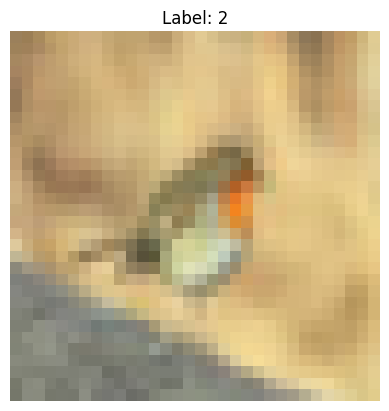

In [ ]:
i = random.randint(0, len(train_images) - 1)

plt.imshow(train_images[i])
plt.title("Label: {}".format(train_labels[i][0]))
plt.axis('off')
plt.show()

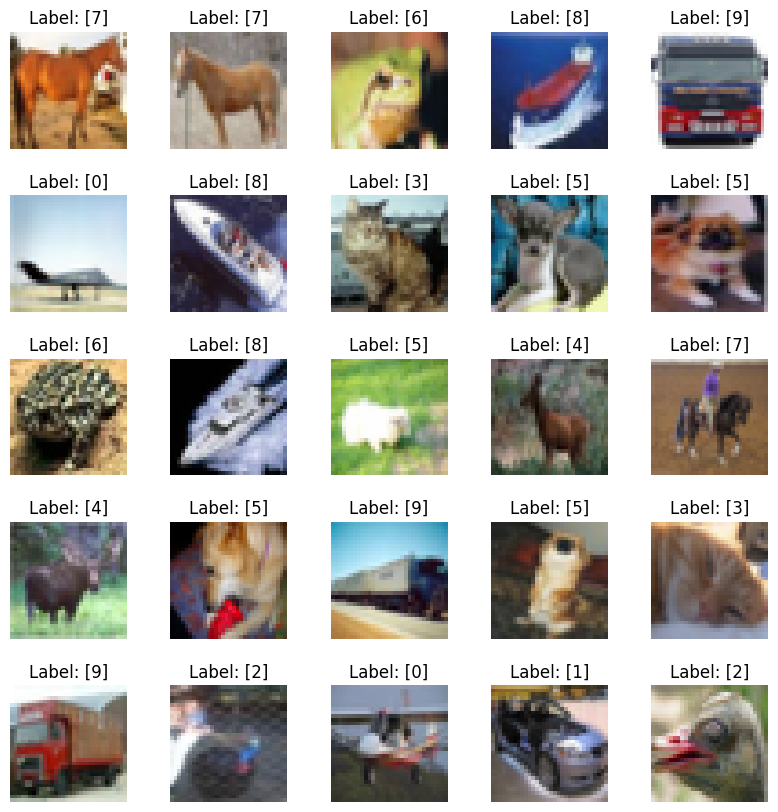

In [ ]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize=(10, 10))
axes = axes.ravel()

for i in range(W_grid * L_grid):
    index = np.random.randint(0, len(train_images))
    axes[i].imshow(train_images[index])
    axes[i].set_title("Label: {}".format(train_labels[index]))
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()

# Etapa 04: Tratamento de dados

In [ ]:
train_images = train_images.reshape(50000, 32, 32, 3)
test_images = test_images.reshape(10000, 32, 32, 3)

# Etapa 05: Construção e Treinamento do modelo

In [ ]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(1024, activation='relu'))
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
cnn.compile(loss= 'sparse_categorical_crossentropy', optimizer='Adam', metrics= ['accuracy'])

In [ ]:
epochs_hist = cnn.fit(train_images, train_labels, batch_size=250, epochs=10)

Epoch 1/10
200/200 [==============================] - 126s 344ms/step - loss: 1.6681 - accuracy: 0.3871
Epoch 2/10
200/200 [==============================] - 69s 344ms/step - loss: 1.3254 - accuracy: 0.5223
Epoch 3/10
200/200 [==============================] - 67s 336ms/step - loss: 1.1642 - accuracy: 0.5859
Epoch 4/10
200/200 [==============================] - 65s 323ms/step - loss: 1.0660 - accuracy: 0.6229
Epoch 5/10
200/200 [==============================] - 68s 340ms/step - loss: 0.9915 - accuracy: 0.6500
Epoch 6/10
200/200 [==============================] - 68s 340ms/step - loss: 0.9182 - accuracy: 0.6782
Epoch 7/10
200/200 [==============================] - 68s 339ms/step - loss: 0.8533 - accuracy: 0.6999
Epoch 8/10
200/200 [==============================] - 74s 369ms/step - loss: 0.8006 - accuracy: 0.7202
Epoch 9/10
200/200 [==============================] - 68s 342ms/step - loss: 0.7579 - accuracy: 0.7365
Epoch 10/10
200/200 [==============================] - 68s 338ms/step - 

In [ ]:
evaluation = cnn.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 15ms/step - loss: 0.8438 - accuracy: 0.7092


In [ ]:
prediction = cnn.predict(test_images)
prediction_classes = np.argmax(prediction,axis=1)
prediction_classes

313/313 [==============================] - 5s 15ms/step


array([3, 8, 8, ..., 5, 4, 7])

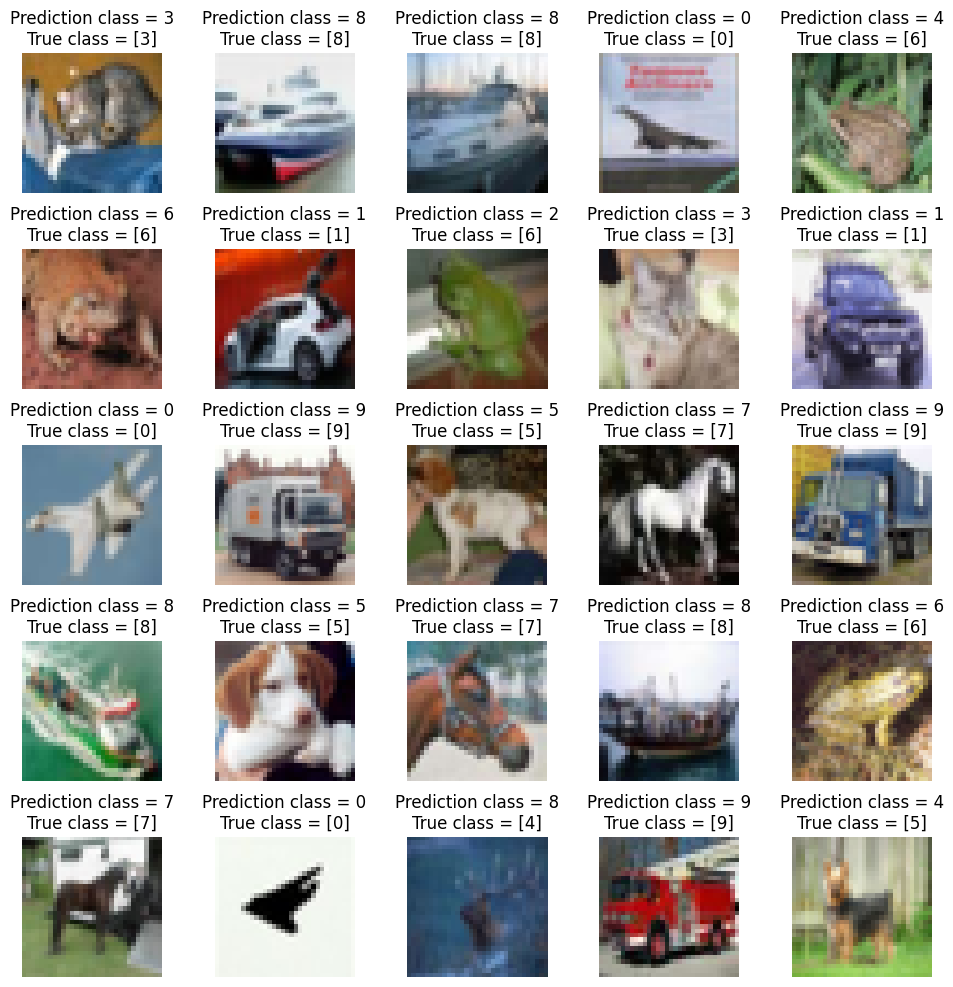

In [ ]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize=(12, 12))
axes = axes.ravel()

for i in range(W_grid * L_grid):
    axes[i].imshow(test_images[i])
    axes[i].set_title("Prediction class = {}\nTrue class = {}"
                      .format(prediction_classes[i], test_labels[i]))
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()

<Axes: >

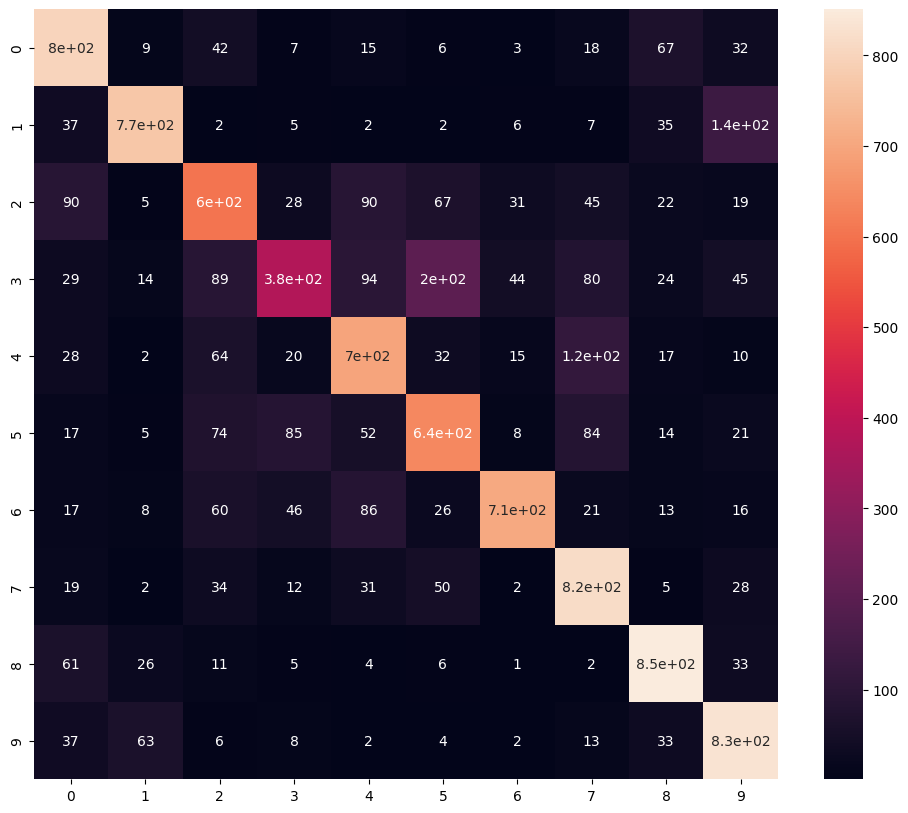

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
num_class = 10
target_names = ["Class {}".format(i) for i in range(num_class)]
target_names
print(classification_report(test_labels, prediction_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.71      0.80      0.75      1000
     Class 1       0.85      0.77      0.81      1000
     Class 2       0.61      0.60      0.61      1000
     Class 3       0.64      0.38      0.47      1000
     Class 4       0.65      0.70      0.67      1000
     Class 5       0.62      0.64      0.63      1000
     Class 6       0.86      0.71      0.78      1000
     Class 7       0.68      0.82      0.74      1000
     Class 8       0.79      0.85      0.82      1000
     Class 9       0.71      0.83      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000

